# Methods Performed:

1. Problem Defination 
2. Get the data 
3. Gain the insights from data by discovering and Visualizing 
4. Prepare this data for Machine Learning Algorithm
5. Select the model for Train and Test
6. Fine tune your model 
7. Present your solution 

After few days more data is genrated and due to which it may effect the accuracy to our model. To avoid this we need to monitor the machine for few more days

Probleam Approach that takes place:
1. Fist the client comes to comapny and expalin its problem.
2. Then a Project Meeting takes place between the manager and his team to explain the project.
3. Then the manager gets back to the client and informs that we can solve his problem but we would require data. The client request to not leake the data. So the manager says we would have a proper garement and documention dont worry.
    

## Lets get started !!!

### Buisness Problem: How many hours students need to do the study to get 99% Marks.
How many hours need to do study to get pass.
And if i study x() hours per day so how much marks i will get

In [2]:
# Import libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


In [3]:
# Load the data

# path = r'location' which can be database or google drive 
data = pd.read_csv('student_info.csv')
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
data.shape

(200, 2)

## Exploratory Data analysis(EDA)

Discover and visualize data to gain insights

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
study_hours      195 non-null float64
student_marks    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
data.describe() 
# 25% students study for 5 hours and get 

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


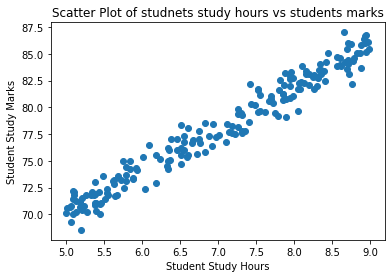

In [15]:
plt.scatter(x = data.study_hours, y= data.student_marks)
plt.xlabel('Student Study Hours')
plt.ylabel('Student Study Marks')
plt.title('Scatter Plot of studnets study hours vs students marks')

plt.show()

# Prepare the data for Machine Learning Algorithms

In [17]:
# Data Cleaning : trating missing values so that while training my model it can predict accurately

data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [21]:
# calculating the average and saying as per the data students in an average study for 6hours and get score of 77%

data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [23]:
# Imputing the NAN with mean 

data1 = data.fillna(data.mean())
data1.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [25]:
data1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [27]:
# Split the datset 

X = data1.drop('student_marks',axis=1)
y = data1.drop('study_hours',axis=1)

In [30]:
print('Shape of X=',X.shape)
print('Shape of y=',y.shape)

Shape of X= (200, 1)
Shape of y= (200, 1)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train=',X_train.shape)
print('Shape of y_train=',y_test.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (160, 1)
Shape of y_train= (40, 1)
Shape of X_test= (40, 1)
Shape of y_test= (40, 1)


# Select a model and train it 

In [38]:
# y = mx+c 
# class import and then import its packages 

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([[3.93571802]])

In [42]:
lm.intercept_

array([50.44735504])

In [44]:
m =3.93
c= 50.44 
# x= 4 i.e i am studying for 4 hours 
y =m*4+c
y

66.16

In [49]:
lm.predict([[4]])[0][0].round(2)

66.19

In [51]:
pred = lm.predict(X_test)
pred 

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [54]:
# cross checking the machines predication 

pd.DataFrame(np.c_[X_test,y_test,pred],columns=['study_hours','Student_%_original','Studnets_%_predicated'])

,study_hours,Student_%_original,Studnets_%_predicated
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Fine Tune Model : Accuracy Checking

In [56]:
lm.score(X_test,y_test)

# thus our accuracy is 0.95%

0.9514124242154464

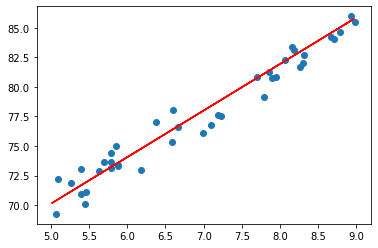

In [58]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lm.predict(X_train),color='r')

# Present Your Solution to client !!!
And if he says increase the accuracy then we ask for more data and if the accuracy come out to be same then we need to convence the client and say we can not increase the accuracy!!!!

#### Save MI Model : Used to save the linear regression model

In [66]:
import joblib 
joblib.dump(lm, 'Student_Mark_Predication.pkl')

['Student_Mark_Predication.pkl']

In [70]:
model = joblib.load('Student_Mark_Predication.pkl')

In [73]:
model.predict([[5]])

array([[70.12594512]])

# Launch , Monitor and maintain your system 